## Scientific Computing for Finance -- Homework 2 
* Author: **Renke Cai**
* Please report bugs or send advice to *renke.cai@nyu.edu* 
* NYU ID: N19628746
* Date: 02/09/2016

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import fmt
import sympy as sp
import time
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Problem 1:

Prove the following properties for the matrix norm, where $A, B$ are matrices, $\boldsymbol u$ is a vector and $b$ is a scaler.
$\renewcommand{bs}{\boldsymbol}$
* $\Vert A ^{-1} \Vert = \max_{\bs u \ne 0} \frac{\Vert \bs u\Vert}{\Vert A \bs u \Vert} = \left(\min_{\bs u \ne 0} \frac{\Vert A \bs u \Vert}{\Vert \bs u \Vert}\right)^{-1}$
* $\Vert A \boldsymbol u \Vert  \le \Vert A\Vert \; \Vert \boldsymbol u\Vert $
* $\Vert b A\Vert  = \vert b\vert \; \Vert A\Vert $ 
* $\Vert A + B\Vert  \le \Vert A\Vert  + \Vert B\Vert $
* $\Vert AB\Vert  \le \Vert A\Vert \Vert B\Vert$

### Solution

**(1)** $$ \Vert A^{-1}\Vert  = \max_{\bs y \ne 0}\frac{\Vert A^{-1}\bs y\Vert }{\Vert \bs y\Vert }  $$
Let $y=Au$, then
$$ \Vert A^{-1}\Vert  = \max_{\bs Au \ne 0}\frac{\Vert A^{-1}Au \Vert }{\Vert \bs Au \Vert } = \max_{\bs u \ne 0}\frac{\Vert u \Vert }{\Vert \bs Au \Vert } = \left(\min_{\bs u \ne 0} \frac{\Vert A \bs u \Vert}{\Vert \bs u \Vert}\right)^{-1} $$

**(2)** By definition of matrix norm
$$ \Vert A\Vert  = \max_{\bs u \ne 0}\frac{\Vert A\bs u\Vert }{\Vert \bs u\Vert }, $$
which implies $$\Vert A\Vert \geq \frac{\Vert A\bs u\Vert }{\Vert \bs u\Vert }, \text{for all} ~u \ne 0$$
Thus $$ \Vert A\Vert \Vert \bs u\Vert \geq \Vert A\bs u\Vert , \text{for all} ~u \ne 0$$
And it holds when $u=0$ as well.

**(3)** By the Homogeneous of vector norm: $\Vert a \bs u \Vert  = |a| \Vert \bs u\Vert $, then from the definition of matrix norm we have
$$
\begin{align}
\Vert bA\Vert & = \max_{\bs u \ne 0}\frac{\Vert bA\bs u\Vert }{\Vert \bs u\Vert }\\
 & = \max_{\bs u \ne 0}\frac{\vert b\vert \; \Vert A\bs u\Vert }{\Vert \bs u\Vert }\\
 & = \vert b\vert \; \Vert A\Vert
\end{align}
$$

**(4)**
By definition of matrix norm and triangle inequality of vector norm: $\Vert \bs u + \bs v\Vert  \le \Vert \bs u\Vert  + \Vert \bs v\Vert $, we have
$$
\begin{split}
\Vert A+B \Vert & = \max_{\bs u \ne 0}\frac{\Vert (A+B)\bs u\Vert }{\Vert \bs u\Vert }\\
 & \le \max_{\bs u \ne 0}\frac{\Vert A\bs u\Vert + \Vert B\bs u\Vert }{\Vert \bs u\Vert }\\
 & = \Vert A\Vert + \Vert B\Vert
\end{split}
$$

**(5)** From (2) we have got
For any vector $ y $, 
$$ \Vert A \bs y \Vert \le \Vert A\Vert \Vert \bs y\Vert
$$
Then by an equivalent definition of matrix norm: $ \Vert A \Vert  = \max_{\Vert \bs u\Vert = 1}{\Vert A \bs u\Vert } $, we have
$$
\begin{split}
\Vert AB \Vert & = \max_{\Vert \bs u\Vert = 1}{\Vert AB \bs u\Vert } \le \max_{\Vert \bs u\Vert = 1}{\Vert A \Vert \Vert B\bs u\Vert } \\
 & = \Vert A \Vert \cdot \max_{\Vert \bs u \Vert = 1}{\Vert B\bs u\Vert}\\
 & = \Vert A\Vert \Vert B\Vert
\end{split}
$$ 

## Problem 2



0. Derive the analytical expression of Cholesky decomposition of a 2 dimensional correlation matrix 
$\left(\begin{array} \\ 1 & \rho \\ \rho & 1 \end{array} \right)$, this result is worth memorizing.
1. Implement the recursive Cholesky decomposition algorithm discussed in the class in Python, with the following requirements:
 - use vector/matrix calculation whenever possible, but you obviously should not just call the buildin numpy/scipy functions for Cholesky decomposition 
 - detect and throw exception if the input matrix is not semi-positive definite
3. test your program against the version provided in scipy.linalg, and compare their performance

Hint: for #2, if you don't know what conditoin to catch, you can create a non-SPD matrix and observe how your program can fail. 

### Solution
**(1)** 
Let $A=\left(\begin{array} \\ 1 & \rho \\ \rho & 1 \end{array} \right)=LL^T$, assuming that $ L = \left(\begin{array} \\ a & 0 \\ b & c \end{array} \right) $, then we have
$$ 
\begin{split}
LL^T & = \left(\begin{array} \\ a & 0 \\ b & c \end{array} \right) \left(\begin{array} \\ a & b \\ 0 & c \end{array} \right) \\
& = \left(\begin{array} \\ a^2 & ab \\ ab & b^2+c^2 \end{array} \right) \\
& \Rightarrow a = 1, b = \rho, c = \sqrt{1 - \rho^2 }
\end{split} 
$$
Thus, we have $ L = \left(\begin{array} \\ 1 & 0 \\ \rho & \sqrt{1 - \rho^2 } \end{array} \right) $

**(2) & (3)**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

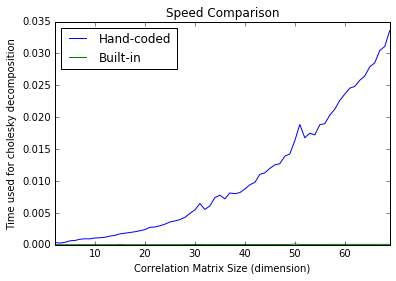

In [2]:
def creduce(A):
    pivot = A[0, 0]
    b = np.mat(A[1:, 0])
    B = A[1:, 1:]
    return B - (b.T * b) / pivot

# core function
def cholesky_handcoded(A):
    if not(np.linalg.eigvals(A).all >= 0) : 
        #  throw exception if the input matrix is not semi-positive definite:
        raise ValueError("The matrix is NOT semi-positive definite")
    n = A.shape[0]
    if n == 1:
        return np.sqrt(A)
    b = np.mat(A[1:, 0])
    pivot = np.sqrt(A[0, 0])
    return np.bmat([
        [np.mat(pivot), np.zeros((1, n - 1))],
        [b.T / pivot, cholesky_handcoded(np.array(creduce(A)))]  #recursive
    ])

# test and print the cholesky decomposition of a given matrix
A = np.array([[1.,0.5,0.6],[0.5,1.,0.4],[0.6,0.4,1.]])

L1,L2 = sp.symbols("L_built-in L_coded")

fmt.displayMath(fmt.joinMath('=', L1, sp.Matrix(np.linalg.cholesky(A))))
fmt.displayMath(fmt.joinMath('=', L2, sp.Matrix(cholesky_handcoded(A))))

## generate a random correlation matrix with dimension 'n'
def random_cm(n):
    A = np.matrix([np.random.randn(n) + np.random.randn(1)*2. for i in range(n)])
    A = A*A.T
    D_half = np.diag(np.diag(A)**(-0.5))
    return D_half*A*D_half



x = np.arange(2,70) #correlation matrix size range from 2 to 70
time_hand = np.zeros(x.size)
time_builtin = np.zeros(x.size)

for i in x:
    temp1 = np.array(random_cm(i)) # generate a random correlation matrix with dimension i
    t0 = time.clock()
    r1 = cholesky_handcoded(temp1)
    t1 = time.clock()
    r2 = np.linalg.cholesky(temp1)
    t2 = time.clock()
    time_hand[i-2] = t1 - t0
    time_builtin[i-2] = t2 - t1

# Plot the time used for both the hand-coded and built-in method to do matrix product
df = pd.DataFrame(np.array([time_hand, time_builtin]).T, index=x, columns=['Hand-coded', 'Built-in'])
plot1 = df.plot(title="Speed Comparison")
plot1.set_xlabel("Correlation Matrix Size (dimension)")
plot1.set_ylabel("Time used for cholesky decomposition")
plt.show()

## Problem 3

Take the portfolio and historical stock time series of the Dow Jones industrial average (DJIA) index:

In [3]:
djiaurl = "https://raw.githubusercontent.com/yadongli/nyumath2048/master/data/djia.csv"
djia = pd.read_csv(djiaurl, index_col=[0])

fmt.displayDF(djia)

,Name,Sector,Weights
Ticker,,,
MMM,3M Co.,Diversified Industrials,0.0539
AXP,American Express Co.,Consumer Finance,0.0324
T,AT&T Inc.,Fixed Line Telecommunications,0.0134
BA,Boeing Co.,Aerospace/Defense Products & Services,0.0483
CAT,Caterpillar Inc.,Commercial Vehicles & Trucks,0.0373
CVX,Chevron Corp.,Integrated Oil & Gas,0.0438
CSCO,"Cisco Systems, Inc",Networking & Communication,0.0091
KO,Coca-Cola Co.,Soft Drinks,0.0168
DD,E.I. DuPont de Nemours & Co.,Commodity Chemicals,0.0263


C:\Users\Jamie\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:16: FutureWarning: sort(....) is deprecated, use sort_index(.....)


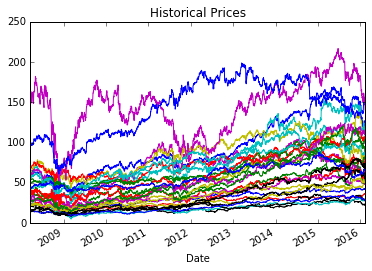

In [4]:
def download_hist_prices(tickers) : # we download the stock prices from Yahoo!Finance
    base_url = "http://ichart.finance.yahoo.com/table.csv?s="
    closeKey = 'Adj Close'
    dfs = []

    for ticker in tickers:
        try :
            url = base_url + ticker
            dfs.append(pd.read_csv(url, parse_dates=[0], index_col=[0]).rename(columns={closeKey:ticker})[ticker])
        except Error:
            print "error in " + ticker
            continue

    return pd.concat(dfs, axis=1, join='inner')

histprice = download_hist_prices(djia.index).sort()
histprice.plot(legend=False, title='Historical Prices');

1. estimate the historical correlation and covariance matrix of the DJIA constiuents' daily returns, 
2. estimate historical excess return of individual stocks (assume the historical risk free rate is 3%)
3. compute the optimal portfolio using the estimated historical excess return and covariance matrix, comment on whether the portfolio looks reasonable.
4. compute the implied return forecast from the actual DJIA portfolio, compare this to the historical estimate, comment on which may be a better forecast for the future returns.
5. compute the condition number of the covariance matrix, and comments the numerical stability of the optimal portfolio. You can use the python function ```numpy.linalg.norm``` for matrix norm.
2. take the daily return time series, and split them into two segments: one only contains odd days' returns and the other only contains even days' returns. Then estimate every DJIA stock's annualized return and annualized vol from these two data segements, and compare their results. Please comment on which of the two metric, return or volatility, can be reliably estimated from historical data. 
6. [Extra credit] Please repeat the analysis using weekly returns and comment on whether the results are materially different
6. [Extra credit]: use numerical simulation to show that the optimal portfolio from #3 indeed has the largest Sharp ratio for the historical excess return and covariance; the best way to illustrate this is to introduce many random perturbations around the optimal portfolio. ```numpy.random``` is a random number generator package in Python.
7. [Extra credit, open question] comment on what practical implication you might infer from the results in 8.

Hints and requirements: 
* as discussed in class, returns are only meaningful in the relative sense, so please annualize all your results. You will lose credit without annualization.
* you may run into singular matrix when reverting the covariance matrix, try to find a work around if you do, (imagine what you would do if your future boss needs some results fast, and he doesn't understand what is a singular matrix that can't be inverted).
* on part 5, you can use array slice to split btw even and odd elements, see the following example:

In [5]:
whole = np.arange(1, 10)
print "whole = ", whole
odd = whole[0::2]
even = whole[1::2]
print "even = ", even
print "odd = ", odd

whole =  [1 2 3 4 5 6 7 8 9]
even =  [2 4 6 8]
odd =  [1 3 5 7 9]


### Solution
**(1)** First we obtain the covariance and correlation matrix:

In [6]:
r = np.log(histprice).diff()
cm = r.corr()
cv = r.cov() 
fmt.displayDFs(cm, cv*1e4, headers=['Correlation', 'Covariance'], fmt="3f")

**(2)** Then we obtain the historical excess return and annulize it:

In [7]:
Rf = 0.03
ER = np.mean(r)*252 - Rf  #annualize
df_er = pd.DataFrame(ER*100, columns = ["Excess Return (%)"]).T
fmt.displayDFs(df_er, headers=['Historical Excess Return'])

**(3)** Perform the mean-variance optimization and obtain the portfolio weights, they look reasonable since stocks with higher return tend to have greater weights.

In [8]:
cvi = np.linalg.inv(cv)
w = cvi.dot(ER.T)/ER.T.dot(cvi).dot(ER)
w = w/np.sum(w)
df_er.ix['Portfolio Weights', :] = w
fmt.displayDFs(df_er[-1:],  headers=['Mean-variance optimal portfolio'])

**(4)** Below we computed the implied return and compare it to the historical return. Note that implied return only makes sense in a relative way, so we scale the return of the first stock to make it equals its historical return, then we graph them to see the relation. 

Results show that the implied return has no direct relation with respect to historical return, which is resonable since the weights in actual DJIA portfolio is not determined by MV optimization. Hence this cannot be used as forecast for future returns.

In [9]:
w2 = djia.iloc[:,2].T
vb = w2.dot(cv).dot(w2)
ir = cv.dot(w2)/vb
df = pd.DataFrame(np.array([w2, ir])*100, index=["$ Position", "Implied Return (%)"], 
                  columns = histprice.columns)
fmt.displayDFs(df[1:], headers = ['Implied Return'], fmt = "2f")

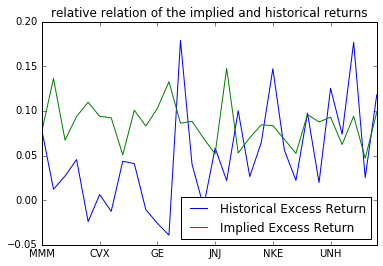

In [10]:
# scale the return to make the MMM's implied and historical returns equal
ir_scaled = ir/(ir[0]/ER[0])
df4 = pd.DataFrame(np.array([ER, ir_scaled]).T, columns = ['Historical Excess Return', 'Implied Excess Return'], index = r.columns)
df4.plot(title = 'relative relation of the implied and historical returns')

**(5)** As we can see below, the condition numbers are large, meaning the optimal portfolio is not numerical stable.

In [11]:
fmt.displayDF(pd.DataFrame([np.linalg.cond(cv, n) for n in (1, 2, inf)],
             index = ["L-1", "L-2", "L-$\infty$"], columns=['Condition number $\kappa$']), 
              fmt="4g")

,Condition number $\kappa$
L-1,435.3
L-2,180.5
L-$\infty$,435.3


**(6)** we split the return series by odd and even days and compute the annulized return and volatility for each category. 

The graphs below show that expected return can be more reliably estimated than volatility, which is more sensible to the data.

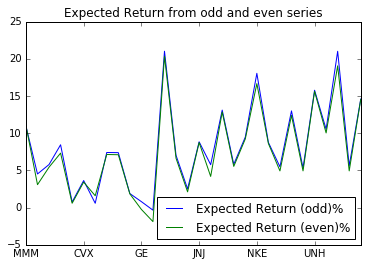

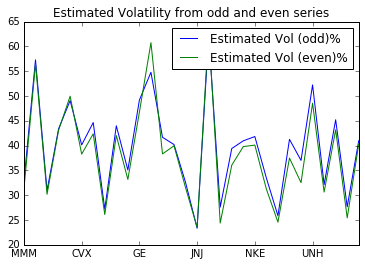

In [12]:
price_odd = histprice.iloc[0::2,:]
price_even = histprice.iloc[1::2,:]

r_odd = np.log(price_odd).diff()
r_even =np.log(price_even).diff()
r_odd_ann = np.mean(r_odd)*252/2
r_even_ann = np.mean(r_even)*252/2

vol_odd = np.std(r_odd)*np.sqrt(252)
vol_even = np.std(r_even)*np.sqrt(252)

df5 = pd.DataFrame(np.array([r_odd_ann*100, r_even_ann*100]).T, columns = ["Expected Return (odd)%", "Expected Return (even)%"], index = r.columns)
df6 = pd.DataFrame(np.array([vol_odd*100,vol_even*100]).T, columns = ["Estimated Vol (odd)%", "Estimated Vol (even)%"], index = r.columns)
fmt.displayDFs(df5.T, headers = ['Expected Return from odd and even series'], fmt="2f")
fmt.displayDFs(df6.T, headers = ['Expected Volatility from odd and even series'], fmt="2f")
df5.plot(title = 'Expected Return from odd and even series')
df6.plot(title = 'Estimated Volatility from odd and even series')